In [1]:
import pandas as pd

In [6]:
# read and split columns separately
df = pd.read_csv('data\\bank-full.csv', sep=";")

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


y
no     39922
yes     5289
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution'}, xlabel='y'>

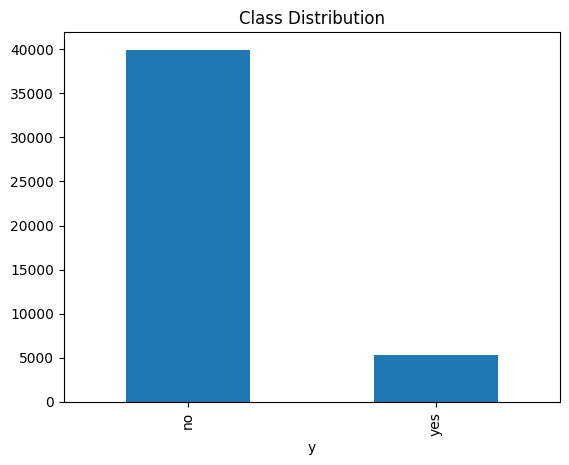

In [15]:
class_counts = df['y'].value_counts()
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution')

In [16]:
total_samples = len(df)
class_proportions = (class_counts / total_samples) * 100
print(class_proportions)


y
no     88.30152
yes    11.69848
Name: count, dtype: float64


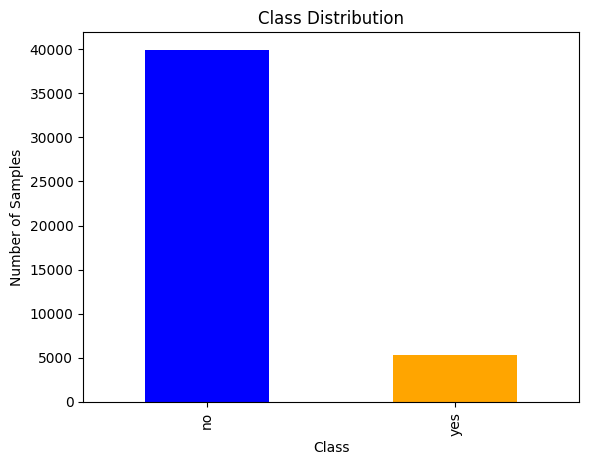

In [17]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


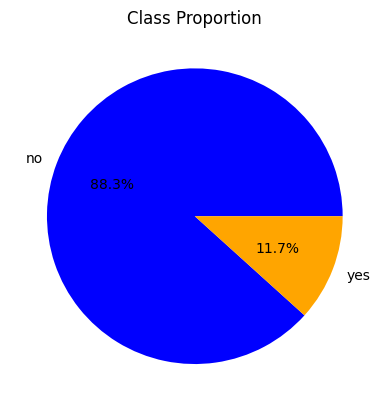

In [18]:
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Class Proportion')
plt.ylabel('')
plt.show()


In [19]:
# Ratio of minority to majority class
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 0.13


### Data cleaning

In [20]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Length: 45211, dtype: int64

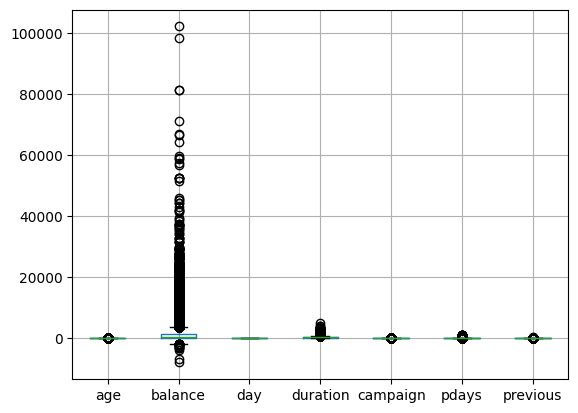

In [25]:
df.iloc[:, :].boxplot()
plt.show()

In [30]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Calculate Q1 and Q3 for numerical columns
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

In [31]:
Q1

age          33.0
balance      72.0
day           8.0
duration    103.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64

In [32]:
Q3

age           48.0
balance     1428.0
day           21.0
duration     319.0
campaign       3.0
pdays         -1.0
previous       0.0
Name: 0.75, dtype: float64

In [33]:
IQR = Q3 - Q1
IQR

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64

In [34]:
LowerLimit = Q1 - 1.5 * IQR
UpperLimit = Q3 + 1.5 * IQR

In [36]:
df3 = ((numerical_columns < LowerLimit) | (numerical_columns > UpperLimit))

In [40]:
df3.tail()

,age,balance,day,duration,campaign,pdays,previous
45206,False,False,False,True,False,False,False
45207,True,False,False,False,False,False,False
45208,True,True,False,True,False,True,True
45209,False,False,False,False,False,False,False
45210,False,False,False,False,False,True,True


In [42]:
# Remove outliers which has at least one outlier
df4 = ((numerical_columns < LowerLimit) | (numerical_columns > UpperLimit)).any(axis=1)
df4

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210     True
Length: 45211, dtype: bool

In [43]:
df5 = ~df4
df5

0         True
1         True
2         True
3         True
4         True
         ...  
45206    False
45207    False
45208    False
45209     True
45210    False
Length: 45211, dtype: bool

In [45]:
dataFrameWithOutOutLiners = df[df5]
dataFrameWithOutOutLiners

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


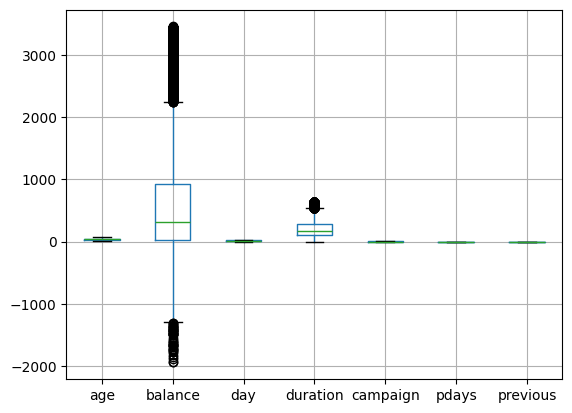

In [47]:
dataFrameWithOutOutLiners.iloc[:,:].boxplot()
plt.show()